## Rajesh's DS & AI Learning

# 1. Reading our MoMA Data Set

We'll learn how to:

* Calculate how old the artist was when they created their artwork.
* Analyze and interpret the distribution of artist ages.
* Create functions which summarize our data.
* Print summaries in an easy-to-read-way.

In [2]:
import os

# Define the name of your CSV file
csv_filename = "artworks_clean.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()

# Move back to the grandparent directory (two levels up)
project_directory = os.path.dirname(os.path.dirname(current_directory))

# Navigate to the "datasets" folder
datasets_directory = os.path.join(project_directory, "DataSets")

# Construct the full path to your CSV file
csv_path = os.path.join(datasets_directory, csv_filename)

# Check if the file exists
if os.path.exists(csv_path):
    print("CSV file found at:", csv_path)
else:
    print("CSV file not found at:", csv_path)

from csv import reader

moma=reader(open(csv_path,encoding='utf-8'))

#convert above data file into list of list format
moma=list(moma)

 Even though we converted the numeric columns to integer types in the previous mission, when we saved the results as a CSV, they became text data again:
 Even though we don't have to clean the data again, we do have to convert these values to numeric types so we can analyze them. You may remember that some of the rows have missing values, so we'll need to handle those as well.

In [ ]:
column_names=moma[:1]
column_names

In [4]:
moma=moma[1:]

In [ ]:
for row in moma[:5]:
    print(row)
print(column_names)

In [13]:
# convert values of 'BeginDate' to int
for row in moma:
    birth_date=row[3]
    if birth_date !='':
        row[3]=int(birth_date)        

In [15]:
# convert values of 'EndDate' to int
for row in moma:
    death_date=row[4]
    if death_date !='':
        row[4]=int(death_date)    

In [16]:
# convert values of 'Date' to int
for row in moma:
    date=row[6]
    if date !='':
        row[6]=int(date)    

# 2. Calculating Artist Ages

There are a handful of cases where the artist's age (according to our data set) is very low, including some where the age is negative. We could investigate these specific cases one by one, but since we're looking for a summary, we'll take care of these by categorizing artists younger than 20 as "Unknown" also.

In [21]:
# calculate age and replace '' with 0 value
ages=[]
for row in moma:
    work_date=row[6]
    birth_date=row[3]
    if type(birth_date)==int and type(work_date)==int:
        age=work_date-birth_date
        ages.append(age)
    else:
        age=0
        ages.append(age)
        

In [22]:
# Replace age<20 with Unknown
final_ages=[]
for age in ages:
    if age<20:
        final_ages.append('Unknown')
    else:
        final_ages.append(age)

In [ ]:
print(final_ages)

# 3. Converting Ages to Decades

We now have a list — ages — containing the artist ages during which each artwork was produced. Because there are many unique ages, we'll calculate only the decade in which the artist created each work. For instance, if we calculate that the artist was 24, we'll record that as the artist being in their "20s."

In [26]:
decades=[]

for age in final_ages:
    if age !='Unknown':
        age=str(age)
        age=age[:-1]
        decade=age+'0s'
        decades.append(decade)
    else:
        decades.append(age)

In [ ]:
print(decades)

# 4. Summarizing the Decade Data

* Calculated the age of the artist when each artwork was created.
* Simplified those ages to a list of "decades" so there were fewer unique values.

The last step of our analysis is to count how many instances of each decade there are. To do this, we're going to use a technique from the Python Fundamentals course: constructing a frequency table.

In [30]:
decades_frequency={}

for decade in decades:
    if decade in decades_frequency:
        decades_frequency[decade]+=1
    else:
        decades_frequency[decade]=1

In [ ]:
print(decades_frequency)

# 5. Inserting Variables Into Strings

In [ ]:
# approach 1 is inserting using string concatenation

name='Rajeshkumar'
age='29'
output= 'my name is'+' '+name+' '+'age is '+age
print(output)

In [ ]:
# Approach 2 is using str.format function

name='Rajeshkumar'
age='29'
data= 'my name is {} and age is {}'
print(data.format(name,age))

# 6. Creating an Artist Frequency Table

In [35]:
artist_freq={}
for row in moma:
    if row[1] in artist_freq:
        artist_freq[row[1]]+=1
    else:
        artist_freq[row[1]]=1

In [ ]:
print(artist_freq)

# 7. Creating an Artist Summary Function

Create a function that displays information for a specific artist.

In [37]:
def artist_summary(name):
    print('There are {} artworks done by {} in dataset'.format(artist_freq[name],name))

In [ ]:
for artist in artist_freq:
    artist_summary(artist)

# 8. Formatting Numbers Inside Strings

One other powerful usage of str.format() method is its ability to help us apply formatting to numbers as they are inserted into the string. 

* We specify number formatting, including things like precision, by adding one of various format specifications inside the braces ({}) of our string
* To indicate the precision of two, we specify :.2f after the name or position of our argument:

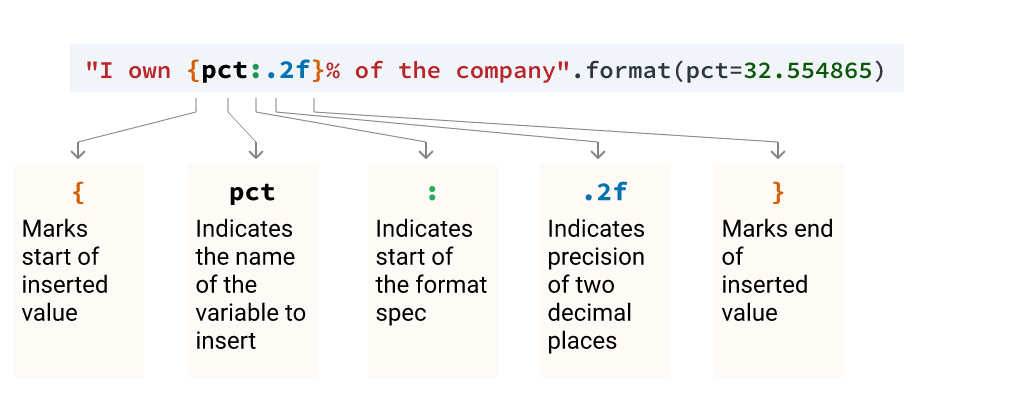

In [ ]:
pop_millions = [
    ["China", 1379.302771],
    ["India", 1281.935991],
    ["USA",  326.625791],
    ["Indonesia",  260.580739],
    ["Brazil",  207.353391],
]
for p in pop_millions:
    c_name=p[0]
    c_pop=p[1]
    print("The population of {} is {b:.2f} million".format(c_name,b=c_pop))

 # 9.Challenge: Summarizing Artwork Gender Data

In [45]:
gender_freq={}
for row in moma:
    if row[-3] in gender_freq:
        gender_freq[row[-3]]+=1
    else:
        gender_freq[row[-3]]=1

In [ ]:
for gender,num in gender_freq.items():
    template = "There are {n:,} artworks by {g} artists"
    print(template.format(g=gender, n=num))